# **Chapter1 나의 첫 머신러닝까지 실습** 


*   머신러닝: 자동으로 데이터에서 규칙을 학습하는 알고리즘을 연구하는 분야
*   딥러닝: 머신러닝 중에 인공 신경망을 기반으로 한 방법들을 통칭함.


---





**-최근접 이웃알고리즘**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Github
%cd MlPracticeRepository
!git add hongong.ipynb
!git commit -m "혼자 공부하는 머신러닝"

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
length=bream_length+smelt_length
weight=bream_weight+smelt_weight
fish_data=[[l,w] for l,w in zip(length,weight)]
fish_target=[1]*35+[0]*14
kn=KNeighborsClassifier()
kn.fit(fish_data,fish_target)
kn.score(fish_data,fish_target)
kn.predict([[10,100]])



1.0


array([0])



*   최근접 이웃 알고리즘은 사이킷런에 존재하는 KNeiborsClassifier를 이용함
*   위의 클래스를 이용해서 kn이라는 객체를 생성함.
*   길이와 무게라는 **특성**을 가지는 2차원 리스트 fish_**data**와 이 fish_data에 
해당하는 물고기가 어떤 물고기인지를 알려주는 fish_target을 객체의 fit을 
이용해서 학습시킴.->**훈련**이라 함.(여기서는 지도훈련)
*   length와 weight의 특성을 가지는 2차원리스트를 만들기 위해서, [[l,w] for l,w in zip(length,weight)]를 이용함.
*   predict를 이용해서 해당데이터가 도미인지 빙어인지를 예측 할 수 있음









In [ ]:
kn.score(fish_data,fish_target)

1.0

이미 kn에 fish_target으로 학습을 시켜놨기 때문에 이와 같은 fish_target과 score를 비교하면 당연히 1.0임
*   fish_data에서 fish_target에 해당하는 값에 대한 점수




In [ ]:
kn49=KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data,fish_target)
kn49.score(fish_data,fish_target)

0.7142857142857143



*   기본적으로 객체생성시에 아무 인자를 받지 않으면 가장 가까운 5개의 데이터를 이용해서 예측을 수행한다.
*   위와 같이 객체 생성시에 인자로 숫자를 넘김에 따라서 몇개의 데이터로 이 데이터가 무엇인지를 확인 할 수 있다.
`



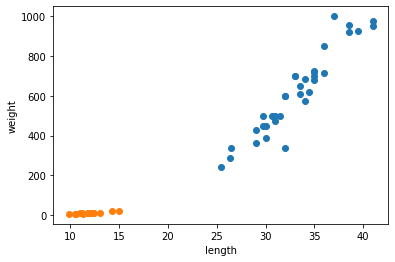

In [ ]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

plt와 scatter를 이용하면 위의 그림처럼 표현이 가능하다.

# **Chapter2.데이터 다루기**


---


**2-1.훈련세트와 테스트 세트**
*  기존의 최근접 이웃 알고리즘 같은 경우 **학습을 시킨 데이터**와 score를 사용한 즉,**예측하려고 하는 데이터**와 동일하므로 당연히 100%로 나올 수 밖에 없음  
*  따라서 학습 시킨 데이터와 다르게 설정해야함.
*   여기서 학습 시키려고 하는 데이터는 **훈련세트**, 테스트하려고 하는 데이터는 **테스트 세트**라고함.


**-지도와 비지도 학습**
*   지도 학습은 데이터인 입력과 정답인 타킷으로 이루어져 있으며, 이를 **훈련 데이터**라고 함.


*   비지도 학습은 타깃없이 입력 데이터만 사용하며, 데이터를 더 잘 파악하거나 변형 할 때 유용함.








In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
fish_length=[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0,
            9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0 ]
fish_weight=[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0,
            6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
fish_data=[[l,w] for l,w in zip(fish_length,fish_weight)]
fish_target=[1]*35+[0]*14
train_input=fish_data[:35]
train_target=fish_target[:35]
test_input=fish_data[35:]
test_target=fish_target[35:]

kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

0.0



*   위와 같이 훈련세트와 테스트세트에서 샘플이 고르게 분포하지 않고, 한 쪽으로 샘플이 몰리는 것을 **Sampling bias**(샘플링 편향)라고 한다.
*   도미의 데이터와 도미에 해당하는 타깃만 학습 시켰으므로, 빙어에 해당하는 데이터가 해당타킷과 매칭을 시키면, 이에 대한 score는 당연히 0점이다.->train에 도미만 존재 하므로 테스트를 아무리 넣어도 도미로 판정함.

In [ ]:
import numpy as np
input_arr=np.array(fish_data)
target_arr=np.array(fish_target)
np.random.seed(42)
index=np.arange(49)
np.random.shuffle(index)
train_input=input_arr[index[:35]]

train_target=target_arr[index[:35]]
test_input=input_arr[index[35:]]
test_target=target_arr[index[35:]]
kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)


[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]
[[  32.   340. ]
 [  12.4   13.4]
 [  14.3   19.7]
 [  12.2   12.2]
 [  33.   700. ]
 [  36.   714. ]
 [  35.   720. ]
 [  35.   725. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  31.5  500. ]
 [  29.   430. ]
 [  41.   950. ]
 [  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]]


1.0



*   numpy를 이용해서 배열을 input_arr로 객체화하고, index에서는 shuffle을 이용해서 랜덤으로 숫자를 넣는다.
*   그 후 index를 이용해서 훈련데이터에 테스트들안에 샘플들의 분포를 고르게 바꾼다.
*  도미와 빙어의 분포를 고르게 바꾸어 학습을 하면 가장 가까운 5개를 이용해서 
예측하는 최근접 이웃의 방식의 취지에 맞게 테스트가 가능해짐. 






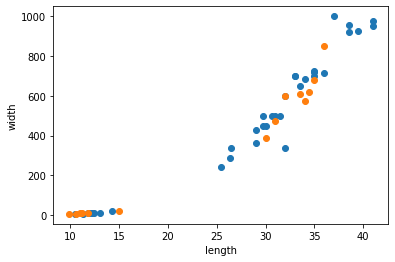

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('width')
plt.show()

훈련세트, 테스트 세트내의 훈련데이터 들이 균일하게 섞인 것을 확인 할 수 있다.

**2-2.데이터 전처리**
*   데이터 전처리란 데이터를 정확하게 **가공**하는 과정을 말한다.
*   데이터의 전처리가 없으면 위에서 진행한 **훈련데이터**를 이용해서 추정을 하는 과정에서 **오류가 발생**함 -> 여기서의 오류는 x축과 y축의 기준이 다르다.





In [ ]:
import numpy as np

fish_data=np.column_stack((fish_length,fish_weight))
print(fish_data)
fish_target=np.concatenate((np.ones(35),np.zeros(14)))
print(fish_target)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]




*   np.column_stack을 이용해서 행과 열을 합치고 가지런히 정리됨.->기본적으로 두 개의 배열을 합쳐서 2차원 배열로 만들어주는 데 사용함. 

*   np.comlum_stack말고도 list인 fish_length,fish_weight을 numpy배열로 변경후 2차원으로 reshape하고,np.append를 이용해서 하는 방법도 있지만 이 경우에은 column_stack이 훨씬 쉬움.  



*   np.concatenate를 이용해서 0,1의 데이터를 합침.

In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target,random_state=42)
print(train_input)
print(train_target)


[[  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]
 [  10.6    7. ]
 [   9.8    6.7]
 [  35.   680. ]
 [  11.2    9.8]
 [  31.   475. ]
 [  34.5  620. ]
 [  33.5  610. ]
 [  15.    19.9]
 [  34.   575. ]
 [  30.   390. ]
 [  11.8    9.9]
 [  32.   600. ]
 [  36.   850. ]
 [  11.     9.7]]
[1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]




*   사이킷런의 train_test_split을 이용해서 훈련세트와 테스트세트를 나눔.
*   random_state은 임의로 조정하기 위한 수단임.


*   위 테스트 세트의 비율이 기존의 전체 fish_data와 다르므로 일부 샘플에 대해 올바르게 학습하지 못 할 것임.





In [ ]:
train_input,test_input,train_target,test_target=train_test_split(
    fish_data,fish_target,stratify=fish_target,random_state=42)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


*   위와 같이 stratify에 fish_target을 인자로 받으면, 그 비율을 맞춰줌.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier();
kn.fit(train_input,train_target)
kn.score(test_input,test_target)
print(kn.predict([[25,150]]))

[0.]




*   test,train에서의 도미와 빙어의 비율은 적절하게 맞추고,예측을 해보았는데
아래와 같은 산점도를 나타낸다.
*   그런데 위와 같이 빙어에 가깝다고 측정되었다.



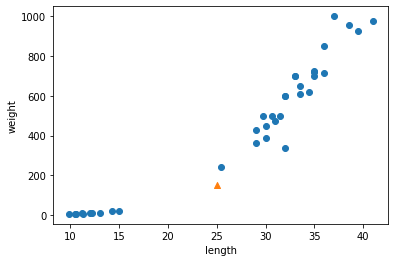

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


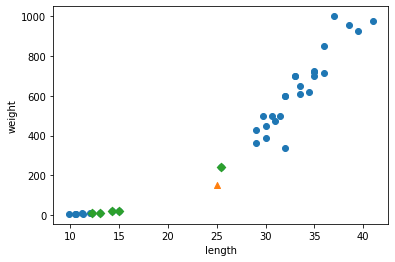

In [ ]:
distances,indexes=kn.kneighbors([[25,150]])
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

*   대충보더라도 25,150 데이터는 도미와 가까운 생선이다.
*   하지만 위 데이터를 가진 생선과 가까운 5개의 생선은 초록색인 5개의 생선으로
빙어라는 생선으로 판명 될수 밖에 없음.
*   이 이유는 x축의 단위가 40인것에 비해 y축은 1000이므로 y축에 훨씬 지대한 영향력을 끼쳐서 그런것임. 즉 실제로는 아래와 같은 산점도이다.





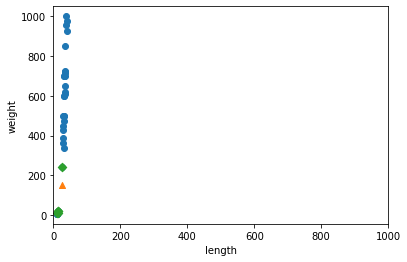

In [ ]:
distances,indexes=kn.kneighbors([[25,150]])
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim(0,1000)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()



*  따라서 위와 같은 산점도에서는 도미가 아닌 빙어로 판명 할 수 밖에 없다.
*  또한 위와 같이 x축의 범위와 y축의 범위가 매우 다른 경우, 두 특성의 **scale**이 다르다고 말함.

*   따라서 특정값을 일정한 기준으로 맞춰 주어야 한다.->데이터 전처리->여기서는 표준점수를 이용한다.






In [ ]:
mean=np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)
print(mean,std)
train_scaled=(train_input-mean)/std
print(train_scaled)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]
[[ 0.37460577  0.09920189]
 [ 0.27666962 -0.17125451]
 [ 0.34522492  0.2546366 ]
 [-1.45680021 -1.27266487]
 [-1.40783213 -1.26862357]
 [-1.29030875 -1.26178444]
 [ 0.57047806  0.56550602]
 [ 0.44316107  0.2546366 ]
 [ 0.66841421  0.87637544]
 [ 0.86428651  0.87637544]
 [ 1.4519034   1.73126635]
 [ 1.20706303  1.56028817]
 [-0.07590051 -0.54740651]
 [-1.3882449  -1.26924531]
 [ 1.30499918  1.57583164]
 [ 0.34522492  0.09920189]
 [ 1.06015881  1.80898371]
 [ 0.47254192  0.2546366 ]
 [-1.53514913 -1.2763953 ]
 [ 0.01224202 -0.39818919]
 [ 0.76635036  0.82974503]
 [ 0.03182925 -0.24275448]
 [-1.52535551 -1.27794965]
 [-1.60370443 -1.27888226]
 [ 0.86428651  0.81420156]
 [-1.46659382 -1.26924531]
 [ 0.47254192  0.17691924]
 [ 0.81531843  0.6276799 ]
 [ 0.71738229  0.59659296]
 [-1.09443646 -1.2378475 ]
 [ 0.76635036  0.48778866]
 [ 0.37460577 -0.08731977]
 [-1.40783213 -1.26893444]
 [ 0.57047806  0.56550602]
 [ 0.96222266  1.34267957]



*   위와 같이 평균으로 빼고 표준편차로 나누면 표준점수를 구할 수 있으며, 이는 대표적인 전처리 방법중에 하나이다.
*   axis가 0이면 행방향으로 로 처리함.-> 그래서 각특성의 평균 및 표준편차를 구할 수 있음<->axis가 1이면 열방향으로 처리한다.



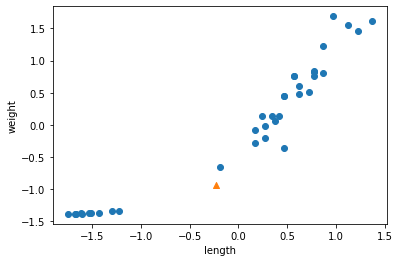

In [ ]:
new=([25,150]-mean)/std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled,train_target)
test_scaled=(test_input-mean)/std
kn.score(test_scaled,test_target)
print(kn.predict([new]))

[1.]






*   25,150의 데이터에 해당하는 생선또한 표준점수로 변환함.
*   그후 kn에 표준점수로 변환한 훈련데이터들로 훈련을 시킴.


*   그 후 기존의 도미로 예측했는데 빙어로 나오던 생선이 도미로 잘 나오는 것을 확인 할 수 있다.
*   즉 **표준점수를 이용한 스케일이 다른 특성을 처리**하는 방법을 여기서 배웠다고 할 수 있다.







# **Chapter3.회귀 알고리즘과 모델 규제**


---



**3.1 K-최근접 이웃 회귀**

**-회귀**


*  지도 학습에는 크게 **분류**(Classification)와 **회귀**(Regression)가 존재함.
*   여기서의 분류는 앞에서도 배웠다 싶이, 대표적으로 **이진 분류**가 있으며,
이 이진분류는 어느 두 개의 집단을 분류하는 방법이다.
*   K-최근접 이웃 분류에서는 **가장 근처에 존재** 하는 집단들을 근거로, 두 집단중 어느 집단인지를 분류 한다.
*   회귀는 분류와 달리 **임의의 값을 예측**하는 것으로, 예를 들면 빙어의 크기, 두께,길이등의 데이터를 이용하여, 무게를 예측하는 것이 대표적인 예이다.
*   여기서 배우는 K-최근접 이웃 회귀는 근처 데이터들의 **평균값**을 이용해서 데이터를 예측한다.












In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input,test_input,train_target,test_target=train_test_split(perch_length,perch_weight,random_state=42)

train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

print(train_input)
print(test_input)





*   이 회귀에서는 길이를 통해 무게를 예측하는 방법을 사용함.
*   그러므로 **길이를 입력으로하고, 무게를 타켓**으로 하는 훈련 데이터를 사용.
*   이에 맞춰서 train_test_split을 이용해서 훈련 세트와 테스트 세트를 만듬.
*   사이킷런에서 사용할 훈련 세트는 **2차원 배열** 이어야 하므로, reshape(-1,1)을 이용해서, 위의 1차원 배열을 2차원 배열로 변환한다.

->-1은 나머지 원소갯수로 행을 채우고(추정의 의미), 1은 열을 의미함.






In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

knr=KNeighborsRegressor()
knr.fit(train_input,train_target)
print(knr.score(test_input,test_target))


test_prediction=knr.predict(test_input)
mae=mean_absolute_error(test_target,test_prediction)
print(mae)



0.992809406101064
19.157142857142862




*   위에서 만든 훈련데이터와 최근접 이웃 회귀를 이용해서 점수를 출력.
*   위의 점수는 **결정계수**를 통해서 점수를 나타냄.
r**2=1-((타깃-예측)제곱의 합)/((타깃-평균)제곱의 합)
*   예측이 타깃이랑 가까워지면, 점수가 1에 가까워지고,예측이 평균에 가까워지면 결정계수가 0에 가까워짐.


*   **mean_absolute_error**을 이용해서 각 타깃와 예측의 절댓값 오차의 평균을 구한다.

->저기서 나온 19는 평균적으로 예측값이 19만큼 타깃과 차이가 난다는 의미이다.








In [ ]:
print(knr.score(train_input,train_target))

knr.n_neighbors=3
knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))
knr.n_neighbors=30
knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))

0.9698823289099254
0.9804899950518966
0.9746459963987609
0.5880379500164266
0.6042092841373093




*   훈련세트로 위 회귀 프로그램을 점수를 산출하면, 위의 테스트 세트로 점수를 산출 한것 보다 낮은 결과가 나온다. 
*   이렇게 테스트 세트가 훈련세트로 점수를 산출한 값보다 크거나 두 점수 모두가 너무 낮으면, **과소 적합**이라 하고,
훈련 세트가 테스트 세트보다 점수가 높으면, **과대 적합**이라고 한다.


*   훈련을 시킬 때의 **이웃의 수를 조정**함으로써 과대 적합, 과소적합을 조정 할 수 있다.
*   위처럼 이웃의 수를 낮추면->훈련 세트로의 점수가 올라가서 과대 적합
*   이웃의 수를 높이면->테스트 세트의 점수가 올라가서 과소 적합으로 전환된다.



*   이 과대,과소 적합을 잘 조절해야함.











**3.2선형 회귀**


*   기존의 최근접 이웃 회귀의 경우 **가장 가까이 있는 이웃**들을 통해서 회귀를 진행함.
*   따라서 테스트 세트가 훈련 세트에 비해 너무 동떨어져 있는경우 제대로 된 예측을 수행 할 수 없음.



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import numpy as np
knr=KNeighborsRegressor()
knr.n_neighbors=3
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
train_input,test_input,train_target,test_target=train_test_split(perch_length,perch_weight,random_state=42)

knr.fit(train_input,train_target)
print(knr.predict([[50]]))
print(knr.predict([[100]]))
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)



ValueError: ignored



*   기존의 훈련세트를 통해서 만든 최근접 이웃 회귀 알고리즘을 통해서 샘플 범위 밖(50,100)에 해당하는 농어의 무게를 예측했다.
*   그런데 가장 가까운 점의 무게를 통해 예측하는 알고리즘 이므로 길이가 50일때와 100일 때 **모두 같은 무게**로 예측한다.



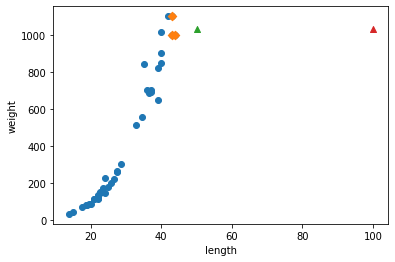

In [ ]:
import matplotlib.pyplot as plt

distances,indexes=knr.kneighbors([[50]])
plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(50,1033,marker='^')
plt.scatter(100,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show() 

위의 상황들을 그림으로 나타내면 위와 같다.
->위와 같은 이유로 다른 회귀 알고리즘인 **선형 회귀**의 필요성이 대두됨.

**-선형 회귀**
*   선형 회귀는 하나의 특성으로 **하나의 직선**을 학습하여 다른 특성을 예측하는 회귀 알고리즘이다.
*   이 알고리즘을 이용하면 샘플의 범위 밖에 있는 데이터에 대해서도 예측이 가능하다.



In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_input,train_target)

print(lr.predict([[50]]))
print(lr.coef_,lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477



*   위의 선형 회귀 학습을 통해서 훨씬 길이가 50일 때의 무게를 훨씬 정확히 예측가능하다.
*   coef는 기울기,intercept는 y절편을 의미한다.



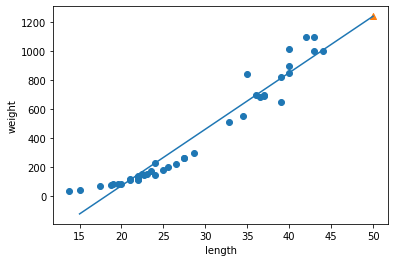

0.939846333997604
0.8247503123313558


In [ ]:
plt.scatter(train_input,train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.scatter(50,50*lr.coef_+lr.intercept_,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))



*   선형 회귀를 이용하면 위와 같이 훈련세트의 **추세**를 위와 같이 선으로 볼 수 있다.
*   하지만 아직까지는 훈련세트,테스트 세트 모두 점수가 낮으므로, 과소적합으로 볼 수 있으며, 테스트 세트에 대한 점수가 훈련세트에 비해서 과하게 낮으므로, 과대 적합으로도 볼 수 있으므로, 적절하게 훈련되었다고 보기는 힘듦-> 위와같은 추세에서는 다항 회귀를 이용하는 것이 훨씬 효율적이라고 할 수 있음. 





In [ ]:
train_poly=np.column_stack((train_input**2,train_input))
test_poly=np.column_stack((test_input**2,test_input))

lr.fit(train_poly,train_target)
print(lr.predict([[50**2,50]]))

[1573.98423528]




*   다항 회귀는 선형회귀에서 사용하는 라이브러리를 그대로 사용하되 인자만 x의 제곱, x를 넣어서 사용하는데, 이 때 인자는 train_poly에 보이듯 np.column.stack을 이용해서 생성함.
*   훨씬 더 나은 예측을 한 것을 알 수 있다.



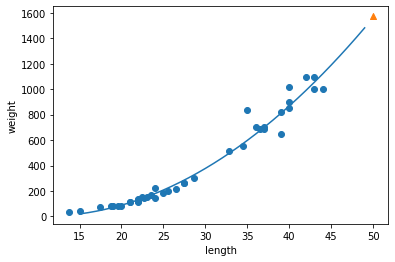

0.9706807451768623
0.9775935108325122


In [ ]:
point=np.arange(15,50)
plt.scatter(train_input,train_target)
plt.plot(point,1.01*point**2-21.6*point+116.05)
plt.scatter(50,1574,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))


위의 선형 회귀보다 훨씬 정확하고, 과대,과소의 그 중앙에서 균형을 이루는 회귀 방법임을 위의 점수를 통해서 확인 할 수 있음.

**3.3 특성공학과 규제**


*   기존의 다항회귀를 이용해서도 꽤 점수가 높은 머신러닝을 만들었음.
*   하지만 만약에 길이외에 두께, 높이등의 다른 특성을 더욱 고려한다면 정확도가 훨씬 올라 갈 것임.-> 다중 회귀

**-다중회귀(multiple regression)**


*   기존의 선형회귀에서는 하나의 특성만을 학습해서 직선을 학습함.
*   다중회귀에서는 여러 특성들, 그리고 이 특성 끼리의 곱, 특성의 제곱등의 
특성을 이용해서 만든 새로운 값 또한 학습시킨다.


*   여기서 기존의 특성을 이용해서 새로운 특성을 뽑아내는 작업을 **특성공학**이라고 한다.









In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df=pd.read_csv('https://bit.ly/perch_csv_data')
perch_full=df.to_numpy()
print(perch_full)
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
train_input,test_input,train_target,test_target=train_test_split(
    perch_full,perch_weight,random_state=42
)

    length   height   width
0      8.4     2.11    1.41
1     13.7     3.53    2.00
2     15.0     3.82    2.43
3     16.2     4.59    2.63
4     17.4     4.59    2.94
5     18.0     5.22    3.32
6     18.7     5.20    3.12
7     19.0     5.64    3.05
8     19.6     5.14    3.04
9     20.0     5.08    2.77
10    21.0     5.69    3.56
11    21.0     5.92    3.31
12    21.0     5.69    3.67
13    21.3     6.38    3.53
14    22.0     6.11    3.41
15    22.0     5.64    3.52
16    22.0     6.11    3.52
17    22.0     5.88    3.52
18    22.0     5.52    4.00
19    22.5     5.86    3.62
20    22.5     6.79    3.62
21    22.7     5.95    3.63
22    23.0     5.22    3.63
23    23.5     6.28    3.72
24    24.0     7.29    3.72
25    24.0     6.38    3.82
26    24.6     6.73    4.17
27    25.0     6.44    3.68
28    25.6     6.56    4.24
29    26.5     7.17    4.14
30    27.3     8.32    5.14
31    27.5     7.17    4.34
32    27.5     7.05    4.34
33    27.5     7.28    4.57
34    28.0     7.82 



*   pandas를 이용해서 csv파일의 데이터를 읽음. 그 후에 읽은 데이터를 numpy를 이용해서 넘파이 배열로 변환.
*   세 가지의 특성을 가진 perch_full과 타겟 데이터인 perch_weight의 데이터를 train_test_spli을 이용해서 훈련 세트, 테스트 세트로 나눈다.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)

test_poly=poly.transform(test_input)
print(test_poly)

[[8.400000e+00 2.110000e+00 1.410000e+00 7.056000e+01 1.772400e+01
  1.184400e+01 4.452100e+00 2.975100e+00 1.988100e+00]
 [1.800000e+01 5.220000e+00 3.320000e+00 3.240000e+02 9.396000e+01
  5.976000e+01 2.724840e+01 1.733040e+01 1.102240e+01]
 [2.750000e+01 7.280000e+00 4.570000e+00 7.562500e+02 2.002000e+02
  1.256750e+02 5.299840e+01 3.326960e+01 2.088490e+01]
 [2.130000e+01 6.380000e+00 3.530000e+00 4.536900e+02 1.358940e+02
  7.518900e+01 4.070440e+01 2.252140e+01 1.246090e+01]
 [2.250000e+01 5.860000e+00 3.620000e+00 5.062500e+02 1.318500e+02
  8.145000e+01 3.433960e+01 2.121320e+01 1.310440e+01]
 [4.000000e+01 1.114000e+01 6.630000e+00 1.600000e+03 4.456000e+02
  2.652000e+02 1.240996e+02 7.385820e+01 4.395690e+01]
 [3.000000e+01 7.620000e+00 4.770000e+00 9.000000e+02 2.286000e+02
  1.431000e+02 5.806440e+01 3.634740e+01 2.275290e+01]
 [2.460000e+01 6.730000e+00 4.170000e+00 6.051600e+02 1.655580e+02
  1.025820e+02 4.529290e+01 2.806410e+01 1.738890e+01]
 [3.900000e+01 1.114000e



*   위에서 pandas를 이용해서 받은 빙어의 세가지의 특성을 변환기인 PolynomialFeatures를 이용해서 서로 곱하고 제곱해서 9가지의 특성을 가지는 새로운 훈련세트를 만든다.
*   기본적으로 PolynomialFeatures는 제곱 그리고 서로 곱한것까지만(즉 차수의 합이 2일 때) 변환해주며, 이를 바꾸기 위해서는 차수를 바꾸어 주면 됨.


*   위에서 train_input에 대해서만 fit을 사용한 이유는 이미 train_input을 학습 하면서 어떻게 조합할 지 학습을 했기 때문에, 굳이 test_input을 변환 할 때는 학습을 시키지 않았음.






In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))



0.9903183436982124
0.9714559911594134




*   위에서 만든 train_poly,test_poly의 데이터와 선형회귀를 이용해서 점수를 도출 하면 그래도 꽤 높은 점수가 나오는 것을 알 수 있다.
*   특성을 만약 5개로 추가하면 총 55개의 특성으로 변환되는것 을 볼 수 있다.




In [ ]:
poly=PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)
print(train_poly.shape)
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

(42, 55)
0.9999999999991097
-144.40579242684848




*   차수를 5로 하면 훈련세트에 대해서는 거의 만점에 해당하는 점수가 나옴->왜냐하면 train_input의 많은정보로 훈련했기 때문에 그 정보에 거의 맞는 그래프가 생성됨. 
*   그러나 이 정보에 거의 맞는 그래프 이므로 테스트 세트에 대해서는 거의 맞지 않음.-> 따라서 규제를 이용해서 훈련세트의 과도한 학습을 방해해야함.



**-규제**

*   규제는 위처럼 훈련세트의 과도한 학습(과대 적합)을 막는 것이다.
*   선형회귀 모델의 경우 기울기를 줄여서 보다 보편적으로 학습하도록 진행한다.


*   규제의 경우 특성의 스케일에 맞게 진행해야하므로 정규화를 진행후 해야한다.





In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)
print(train_scaled)

[[-1.01339619 -1.01007487 -1.01952321 ... -0.76449499 -0.75967179
  -0.75143746]
 [-0.73842893 -0.75254307 -0.74466913 ... -0.73198449 -0.72731765
  -0.71950111]
 [-1.11650891 -0.98919391 -0.97371419 ... -0.76114089 -0.75592147
  -0.74734146]
 ...
 [-0.32597805 -0.51589222 -0.33238802 ... -0.65673421 -0.64237495
  -0.62509499]
 [ 1.55296488  1.65572732  1.17358328 ...  1.45958191  1.19906225
   0.95977016]
 [ 0.6936922   0.7717668   0.8987292  ...  0.3701756   0.40321427
   0.43089551]]




*   위와 같이 StandardScaler의 fit과 transform과 fit을 이용해서 훈련세트와 테스트 세트에 대해서 정규화를 진행.




0.9896101671037343
0.9790693977615391


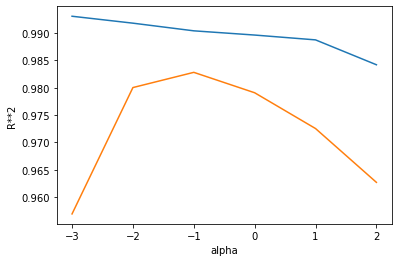

In [ ]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
ridge=Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  ridge=Ridge(alpha)
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R**2')
plt.show()








*   규제에는 크게 릿지, 라쏘 회귀가 존재함.
*   릿지는 fit을 이용해서 학습 후 score로 점수를 보여줌.


*   alpha값이 커지면 규제의 강도가 커지며, 이 alpha값을 잘 규제 해야만, 적절한 즉 제일 덜 과대 적합된 규제를 만들 수 있음. 
*   여기서 제일 될 과대적합 된 규제는 train과 test의 차이가 얼마 나지 않는 -1일때, 즉 -0.1일 때이다.







In [ ]:
ridge=Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9903815817570365
0.9827976465386884


위에서 만든 가장 잘 규제된 때의 alpha값 0.1을 이용해서 ridge회귀를 진행하면 위와 같은 결과를 만들 수 있다.

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


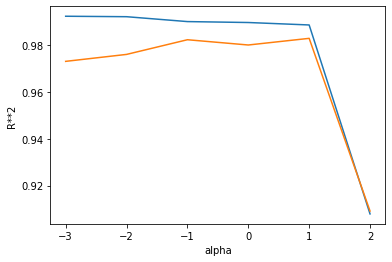

In [ ]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
lasso=Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  lasso=Lasso(alpha,max_iter=10000)
  lasso.fit(train_scaled,train_target)
  train_score.append(lasso.score(train_scaled,train_target))
  test_score.append(lasso.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R**2')
plt.show()



*   라쏘 또한 릿지와 같이 수행 하면 위와 같다.


*   이를 통해 가장 잘 규제 된 알파는 1, 10임을 알 수 있다.
*   오류가 나는 것은 반복횟수가 충분 하지 않아서 생기는 현상임.







In [ ]:
lasso=Lasso(alpha=10)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9888067471131867
0.9824470598706695


가장 잘 규제화된 라쏘는 위와 같다.

# **Chapter 4.다양한 분류 알고리즘**


---
**4.1 로지스틱 회귀**

  


*   기존에 배운 최근접 이웃 알고리즘과 생선의 길이,대각선 길이, 높이, 두께의
정보를 이용해서 생선일 확률을 구해보자. 
*   또한 기존의 도미와 빙어 뿐만 아니라 다른 생선의 데이터도 활용하여 다중분류(multi-class classification)를 진행 해보자.










In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
fish=pd.read_csv('https://bit.ly//fish_csv_data')
print(pd.unique(fish['Species']))
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target=fish['Species'].to_numpy()
train_input, test_input, train_target, test_target=train_test_split(
    fish_input,fish_target,random_state=42
)
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)


['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']




*   우선 판다스를 이용해서 생선들의 정보들을 받고, 훈련세트와 테스트 세트로 나눔
*   그 후 훈련세트와 테스트 세트의 특성들에 대한 표준화를 StandardScaler를 이용해서 진행함.




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))
proba=kn.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=4))

0.8907563025210085
0.85
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]




*   위의 정보와 최근접이웃 알고리즘을 이용해서 학습을 시킴
*   그 후 각 생선이 7가지 생선일 확률을 근접함을 이용해서 나타냄.
(즉, 최근접이웃 알고리즘의 확률 접근 방식임.)

->그러나 이것이 정확하다고 할 수 있을까?




**-로지스틱 회귀**


*  이름은 회귀이지만 어떠한 것이 무엇인지를 알게하는 분류에 해당함. 
*  로지스틱 회귀는 여러 특성들에 가중치를 곱해서 어떠한 값을 만드는 것이다.(앞에서 배운 다중 회귀를 위한 선형방정식과 동일.)
*   로지스틱 함수이자 시그모이드 함수는 위에서 만든 어떠한 값을 0과 1사이의 값으로 바꿔주는 함수이다.
*   여기서의 값이 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스로 판별이 됨.






In [ ]:
from sklearn.linear_model import LogisticRegression
bream_smelt_indexes=(train_target=='Bream')|(train_target=='Smelt')
train_bream_smelt=train_scaled[bream_smelt_indexes]
target_bream_smelt=train_target[bream_smelt_indexes]
lr=LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)
print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.coef_,lr.intercept_)


['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]




*   먼저 빙어와 도미로 로지스틱 회귀를 이용해서 이진 분류를 만든다.
*   predict, 그리고 predict_proba를 이용해서 학습시킨것을 출력하고, 
lr.coef와 lr.intercept를 통해 가중치와 절편을 출력한다.



In [ ]:
lr=LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))
print(lr.predict(test_scaled[:5]))
proba=lr.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=3))

0.9327731092436975
0.925
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]




*   이번에는 로지스틱 회귀를 이용해서 여러 생선들을 다 추가한 전체 데이터의 다중분류를 시행.
*   로지스틱 학습을 할 때 C는 규제지수로써 얼마나 규제할지의 정도를 나타내는 것이다.
*   이진 분류에서 로지스틱 회귀는 시그모이드 함수를 이용하지만, 다중 분류에서는 소프트 맥스 함수를 이용한다.

->소프트 맥스는 사이파이에도 존재함.`













---
**4-2 확률적 경사 하강법**


*   데이터가 추가되는 경우에 새로운 훈련세트를 만들고, 새롭게 훈련을 하는 것은 데이터셋의 크기가 커질 수 있음.
*   하지만 그렇다고 해서 기존의 데이터를 들어온 데이터 만큼 버리게 되는 경우에는 만약 적은 표본을 가지고 있는 샘플의 경우 문제가 발생 할 수 있음.

->이러한 이유 때문에 하나씩 꺼내어 훈련하는 확률적 경사 하강법을 사용함.



*   그리고 이 훈련세트에서 샘플을 하나씩 꺼내어 훈련하는데, 훈련세트를 한번 모두 다 사용했으면 1 에포크가 완료 되었다고 한다.
*   또한 한번 훈련할 때의 기준으로 삼는 것이 필요한 데 이는 여기서는 로지스틱 손실 함수를 이용한다.



*   로지스틱 손실 함수는 기본적으로 이진 분류일 때 사용하며,
양성 클래스 일때는 -log(a)로 표현이 가능 하며,
음성 클래스 일때는 -log(1-a)로 표현이 가능하다.

*   이 손실 함수를 이용해서 값을 내고, 예측 값과 이 값에 대응되는 하나의 함수를 만들어 내어, 훈련을 진행한다.











In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
fish=pd.read_csv('https://bit.ly/fish_csv_data')
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target=fish['Species'].to_numpy()
train_input,test_input,train_target,test_target=train_test_split(fish_input,fish_target,random_state=42)
print(train_target)
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)
sc=SGDClassifier(loss='log',max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))


['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Perch'
 'Perch' 'Perch' 'Bream' 'Perch' 'Parkki' 'Perch' 'Bream' 'Smelt' 'Perch'
 'Roach' 'Bream' 'Pike' 'Bream' 'Pike' 'Perch' 'Parkki' 'Bream' 'Perch'
 'Pike' 'Bream' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Roach' 'Perch'
 'Bream' 'Bream' 'Perch' 'Perch' 'Roach' 'Pike' 'Perch' 'Smelt' 'Pike'
 'Roach' 'Perch' 'Parkki' 'Perch' 'Bream' 'Perch' 'Smelt' 'Perch' 'Parkki'
 'Smelt' 'Perch' 'Perch' 'Roach' 'Bream' 'Perch' 'Perch' 'Roach' 'Roach'
 'Perch' 'Perch' 'Bream' 'Roach' 'Bream' 'Roach' 'Parkki' 'Perch' 'Perch'
 'Perch' 'Perch' 'Pike' 'Pike' 'Perch' 'Bream' 'Perch' 'Bream' 'Whitefish'
 'Pike' 'Bream' 'Bream' 'Roach' 'Perch' 'Pike' 'Bream' 'Pike' 'Parkki'
 'Roach' 'Perch' 'Roach' 'Smelt' 'Whitefish' 'Roach' 'Perch' 'Bream'
 'Whitefish' 'Smelt' 'Pike' 'Roach' 'Smelt' 'Bream' 'Roach' 'Pike' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Smelt' 'Bream' 'Parkki' 'Perch'
 'Bream' 'Perch' 'Perch']
0.773109243697479
0.775


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(




*   판다스로 생선들의 정보를 받아오고, 생선들의 특성을 fish_input에, 생선들의 종을 fish_target에 넣고, train_test_split을 해줌.
*   또한 각 단위들의 scale을 맞추기 위해 standardscaler를 이용해서 정규화를 진행`

*   그 후 SGDClassifier를 이용해서 loss의 파리미터를 로지로 주어서 로지스틱 손실함수를 이용한 확룔적 경사 하강법을 사용.
*   원래 로지스틱 손실함수는 이진 분류에서 사용되지만, 위와 같은 다중 분류에서 사용하는 경우에는 타겟에 해당하는 생선이 양성 나머지를 음성 클래스로 둠

-> 이를 OVR(One Versus Rest)라고 함.






In [ ]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.85


이 partial_fit을 이용해서는 기존보다 호출 할때마다 1에포크 더 진행이 가능함

->점수가 훨씬 나아진 것을 확인 할 수 있다.

**-에포크와 과대/과소 적합**



*   에포크 횟수가 늘어나면 날수록 훈련세트에 대해서 잘 훈련하므로, 훈련세트의 점수가 올라감, 즉 과대 적합이 된다.
*   반대로 적은 에포크 횟수는 훈련세트와 테스트 세트에 잘 맞지 않는 과소 적합을 만든다.
*   규제에서 릿지와 라쏘를 공부 할때 훈련세트와 테스트 세트가 가장 과소적합, 과대적합 되지 않는 계수를 찾았음.마찬가지로 에포크의 횟수를 조정해서 가장 이상적인 하강법을 구현하는게 좋음.







['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


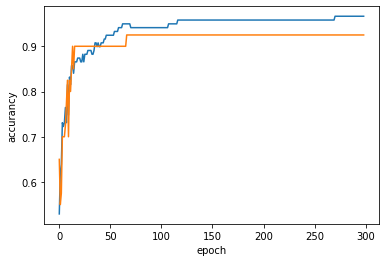

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
sc=SGDClassifier(loss='log',random_state=42)
train_score=[]
test_score=[]
classes=np.unique(train_target)
print(classes)
for _ in range(1,300):
  sc.partial_fit(train_scaled,train_target,classes=classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accurancy')
plt.show()





*   위의 예제에서 partial_fit만 사용하려면(즉 fit을 앞에 사용하지 않고), 무슨 종들이 있는지 np.unique를 이용해서 classes를 만들고, 이것을 훈련시킬 때 넣어줌.
*   위에서 보면 에포크가 100일 때 가장 점수가 이상적임을 알 수 있다.



In [ ]:
sc=SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))
sc=SGDClassifier(loss='hinge',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925
0.9495798319327731
0.925


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


loss에서 다양한 손실함수(hinge등)을 지원함을 알 수 있음.

# **Chapter5.트리 알고리즘**
**5-1. 결정트리**
 
 먼저 와인의 정보인 알코올 도수,당도,PH와 로지스틱 회귀를 가지고 레드와인인지 화이트와인인지 분류하자.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
wine=pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()
wine.info()
data=wine[['alcohol','sugar','pH']].to_numpy()
target=wine[['class']].to_numpy()
train_data,test_data,train_target,test_target=train_test_split(data,target,random_state=42,test_size=0.2)
ss=StandardScaler()
ss.fit(train_data)
train_scaled=ss.transform(train_data)
test_scaled=ss.transform(test_data)
lr=LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
0.7808350971714451
0.7776923076923077


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




*   로지스틱 회귀를 하기 이전에, 먼저 훈련세트와 테스트 세트로 나누고, 각 특성마다 평균,표준편차가 다르므로, StandardScaler를 가지고 정규화를 진행.
*   그 후 로지스틱 회귀를 진행.
*   이렇게 진행 했는데 점수가 둘다 높지 않는 과속적합의 상태임.
*   또한 순서도로 나타내는것이 눈에 더 잘 보임.-> 결정트리의 필요성





**-결정트리**


*   이 정보를 가지고 어떤 와인인지를 찾을 때 연속적인 질문을 통해서, 마치 스무고개같은 방식을 이용하는 것을 결정트리라고 한다.
*   또한 이 질문을 결정할 때 지니 불순도를 이용하는데, 이 때 부모노드와 자식 노드사이의 지니 불순도 차이가 가능한 크도록 질문을 정함.(즉, 지니 불순도가 가장 작은 것을 항상 선택함.)




0.996921300750433
0.8592307692307692


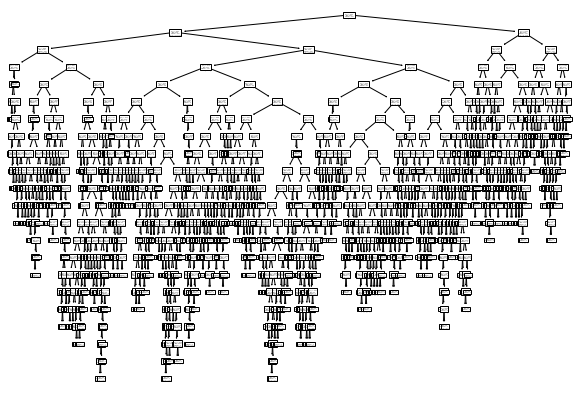

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
dt=DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()






*   DecisionTreeClassifier를 이용해서 학습후 점수를 내보면 기존의 로지스틱 회귀보다 점수가 훨씬 높은 것을 확인 할 수 있다.
*   위에서 맨위의 노드를 루트 노드, 끝의 노드를 리프노드라고 함.



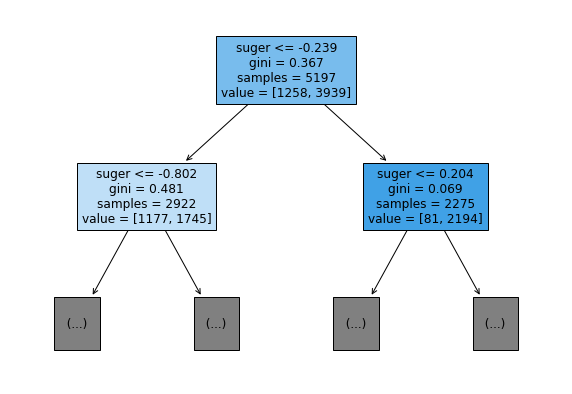

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True, feature_names=['alcohol','suger','pH'])
plt.show()



*   지니 불순도= 1-(음성클래스 비율^^2+양성 클래스 비율^^2) <-부모노드의 이것과 자식노드의 이것의 차이가 큰쪽으로 트리를 만든다.
*   또한 이 차이를 정보이득이라고함.
*   이 차이가 크기 위해서는 나눌 때 최대한 음성과 양성을 한쪽으로 몰리게 옮겨야 함.
*   이 차이= 부모의 불순도-(왼쪽 노드 샘플수/부모의 샘플수)*왼쪽 노드 불순도-(오른쪽 노드 샘플수/부모의 샘플수)*오른쪽 노드 불순도





0.8454877814123533
0.8415384615384616


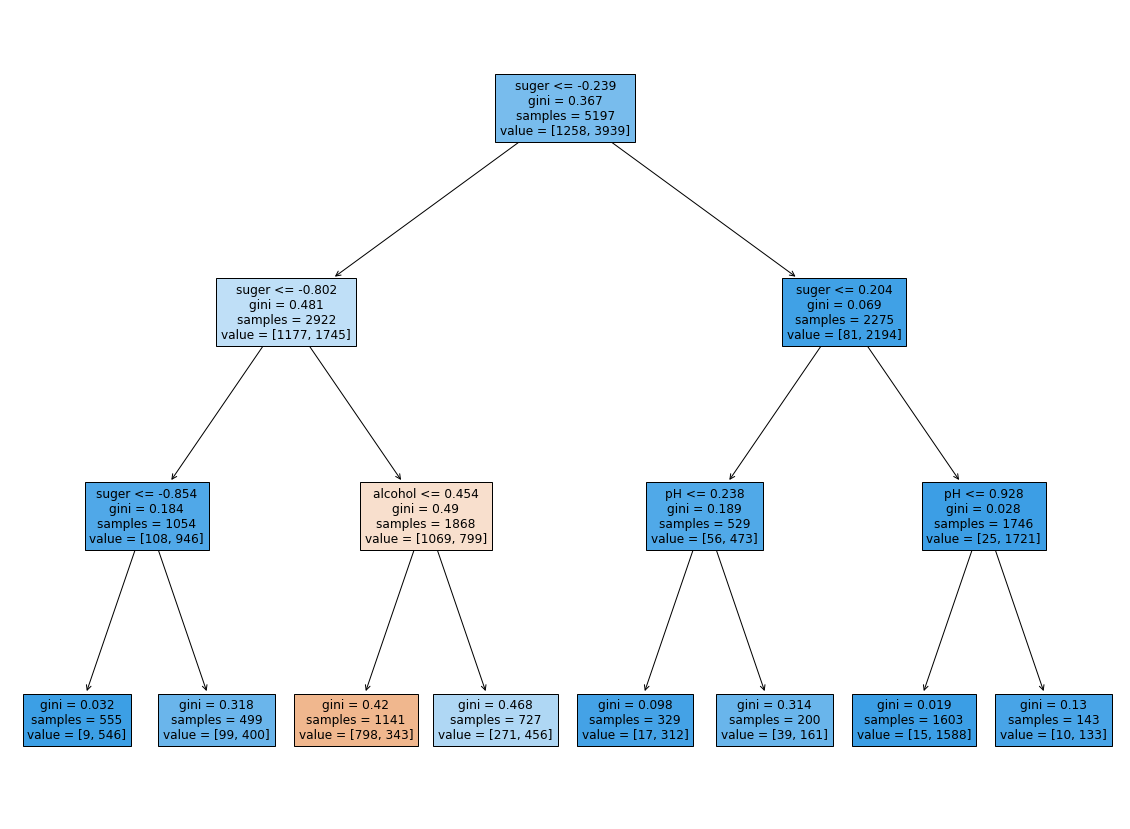

[0.12345626 0.86862934 0.0079144 ]


In [ ]:
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True, feature_names=['alcohol','suger','pH'])
plt.show()
print(dt.feature_importances_)



*   위처럼 깊이의 제한을 두고 학습 하는 것을 가지치기 라고 함.
*   이런 가지치기를 통해서 점수를 향상 시킬 수 있음.
*   또한 어차피 비율을 가지고 계산 하므로 정규화를 하나 안하나 점수는 같음.
*   그리고 각 가중치의 중요도 또한 feature_importance를 통해서 출력이 가능함.








**5-2.교차 검증과 그리드 서치**


*   기존에는 테스트 세트와 훈련세트 두개로 나누어 테스트 세트를 통해서 성능을 검사함
*   따라서 이에 따라서 성능을 맞추면, 테스트 세트에 맞추는 훈련을 하게 되므로, 당연히 잘 맞을 수 밖에 없다.

->테스트 세트를 통해서 일반화 성능을 측정 하려면 테스트 세트 외에 검증 세트를 만들어야 함.`

**-검증 세트**


*   기존의 훈련 세트는 전체의 약 80%정도 였는데, 이 훈련 세트내의 전체의 20%에 해당하는 부분을 검증세트로 지정한다.
*   지정후 훈련세트로 훈련하고, 검증세트로 평가를 하며, 이에 따라 가장 맞는 매개변수를 지정후 모델을 만든다.
*   최종적으로는 훈련세트와 검증세트를 합친 세트를 학습시키고, 테스트 세트로 일반화 성능을 측정함.








In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
wine=pd.read_csv('https://bit.ly/wine_csv_data')
data=wine[['alcohol','sugar','pH']].to_numpy()
target=wine['class'].to_numpy()
train_input, test_input, train_target, test_target=train_test_split(data,target,test_size=0.2,random_state=42)
sub_input,val_input,sub_target,val_target=train_test_split(train_input,train_target,test_size=0.2,random_state=42)
dt=DecisionTreeClassifier(random_state=42)
dt.fit(sub_input,sub_target)
print(dt.score(sub_input,sub_target))
print(dt.score(val_input,val_target))

0.9971133028626413
0.864423076923077




*   기존의 결정트리 코드에서 train_test_split을 훈련세트에 대해서도 한 번 더 수행하면 됨.한번 더 수행하면 검증 세트를 만들 수 있음.
*   만든 훈련세트로 학습을 시키고, 훈련세트, 검증 세트와 각각 점수를 비교해보았는데 그 결과 과대적합 되어있음을 확인 할 수 있다.



**-교차 검증**


*   검증 세트를 하나로 평가 할 경우 안정적인 점수가 안 나올 수 있음.
*   따라서 훈련세트의 여러가지 부분을 검증 세트로 해서 교차 검증을 진행하면 이러한 문제를 해결 할 수 있음.



In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np
scores=cross_validate(dt,train_input,train_target)
print(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.01753378, 0.01798415, 0.01072741, 0.01092839, 0.01094556]), 'score_time': array([0.00390291, 0.00182605, 0.00202274, 0.00159597, 0.00163579]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
0.855300214703487




*   기본은 위처럼 5개를 검증 세트로 교차 검증을 했을 때 각각의 점수를 확인 할 수 있다.
*   그리고 훈련세트를 섞어서 폴드를 나누기 위해서는 분할기를 지정해야 한다.

->이 때 StratifiedKFold를 이용함.



In [ ]:
from sklearn.model_selection import StratifiedKFold
scores=cross_validate(dt,train_input,train_target,cv=StratifiedKFold())
print(np.mean(scores['test_score']))
splitter=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
scores=cross_validate(dt,train_input,train_target,cv=splitter)
print(np.mean(scores['test_score']))

0.855300214703487
0.8574181117533719




*   10개를 분할하여 검증세트로 사용하고자 n_splits=10으로 설정.





*   매개 변수들 즉 max_depth,min_samples_split등의 매개변수가 최적일 때 점수가 가장 잘 나오는데, 점수가 가장 높을 때의 매개변수들은 독립적이지 않고, 종속적이므로, 이 때를 구하려면 매우 많은 반복문을 사용해야함.
*   따라서 이 하이퍼파라미터의 최적해를 구하기 위해서는 Grid Search를 이용한다.
*   이를 수행하는 GirdSeachCV클래스는 하이퍼파라미터 탐색과 교차검증을 한번에 수행하므로 위에서 사용했던 cross_validate를 사용할 필요가 없음.
*   결정트리에서는 불순도로 결정되므로, min_impurity_decrease의 최적해를 찾아야함.









In [ ]:
from sklearn.model_selection import GridSearchCV
params={'min_impurity_decrease': [0.0001,0.0002,0.0003,0.0004,0.0005]}
gs=GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
gs.fit(train_input,train_target)
dt=gs.best_estimator_
print(dt.score(train_input,train_target))
print(gs.best_params_)
print(gs.cv_results_['mean_test_score'])
best_index=np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])



0.9615162593804117
{'min_impurity_decrease': 0.0001}
[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]
{'min_impurity_decrease': 0.0001}




*   먼저 탐색할 매개변수를 지정함.
*   그 후에 훈련세트에서 그리드 서치를 수행해서, 가장 최적의 매개변수를 찾고 저장,


*   이 그리드 서치로 전체 훈련세트(훈련세트+검증 세트)를 학습시킴.
*   만약에 매개변수의 간격을 바꾸려면 랜덤 서치를 이용해야함.





In [ ]:
from scipy.stats import uniform, randint
rgen=randint(0,10)
rgen.rvs(10)
np.unique(rgen.rvs(1000),return_counts=True)
ugen=uniform(0,1)
ugen.rvs(10)

array([0.17121957, 0.49321367, 0.65300847, 0.19361324, 0.59452171,
       0.44283034, 0.83269717, 0.65654079, 0.39587895, 0.1811601 ])



*   싸이파이의 라이브러리 uniform,randint를 이용.
*   uniform은 그 사이의 실수, randint는 정수를 랜덤으로 샘플링함.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params={'min_impurity_decrease':uniform(0.0001,0.001),
        'max_depth':randint(20,50),
        'min_samples_split': randint(2,25),
        'min_samples_leaf':randint(1,25),

}
gs=RandomizedSearchCV(DecisionTreeClassifier(random_state=42),params,n_iter=100,n_jobs=-1,random_state=42)
gs.fit(train_input,train_target)
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))
dt=gs.best_estimator_
print(dt.score(test_input,test_target))




*   여러 매개변수와 싸이파이의 uniform,ranint,랜덤서치객체를 이용하여, 그리드 서치와 비슷하게 만들 수 있음.
*   이를 통해 매개변수를 수동으로 안 바꾸어도 되고, 랜덤서치,그리드 서치를 통해 가장 최적의 매개변수를 찾고 바꾸면 됨을 알 수 있음.

